In [1]:
## Import Python libraries ## 

import numpy as np
import xsimlab as xs
import matplotlib.pyplot as plt
import xarray as xr


%matplotlib inline
%reload_ext xsimlab.ipython


import fastscape

from orographic_precipitation.fastscape_ext import precip_model
from fastscape.processes import Bedrock

In [2]:
print('xarray-simlab version: ', xs.__version__)
print('fastscape version: ', fastscape.__version__)

xarray-simlab version:  0.5.0
fastscape version:  0.1.0


In [3]:
## Build xarray-simlab model ##
SouthernAndesLEM = precip_model
SouthernAndesLEM = precip_model.drop_processes(['init_topography'])
SouthernAndesLEM = SouthernAndesLEM.update_processes({'bedrock': Bedrock})

SouthernAndesLEM

<xsimlab.Model (17 processes, 26 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
surf2erode
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] () or ('y', 'x') background, non-or...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    conv_time              [in] conversion time
    fall_time              [in] fallout time
    nm                     [in] moist stability frequency
    hw  

In [4]:
## Build xarray-simlab model ##
SouthernAndesLEM = precip_model
SouthernAndesLEM = precip_model.drop_processes(['init_topography'])
SouthernAndesLEM = SouthernAndesLEM.update_processes({'bedrock': Bedrock})

SouthernAndesLEM

<xsimlab.Model (17 processes, 26 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
surf2erode
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] () or ('y', 'x') background, non-or...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    conv_time              [in] conversion time
    fall_time              [in] fallout time
    nm                     [in] moist stability frequency
    hw  

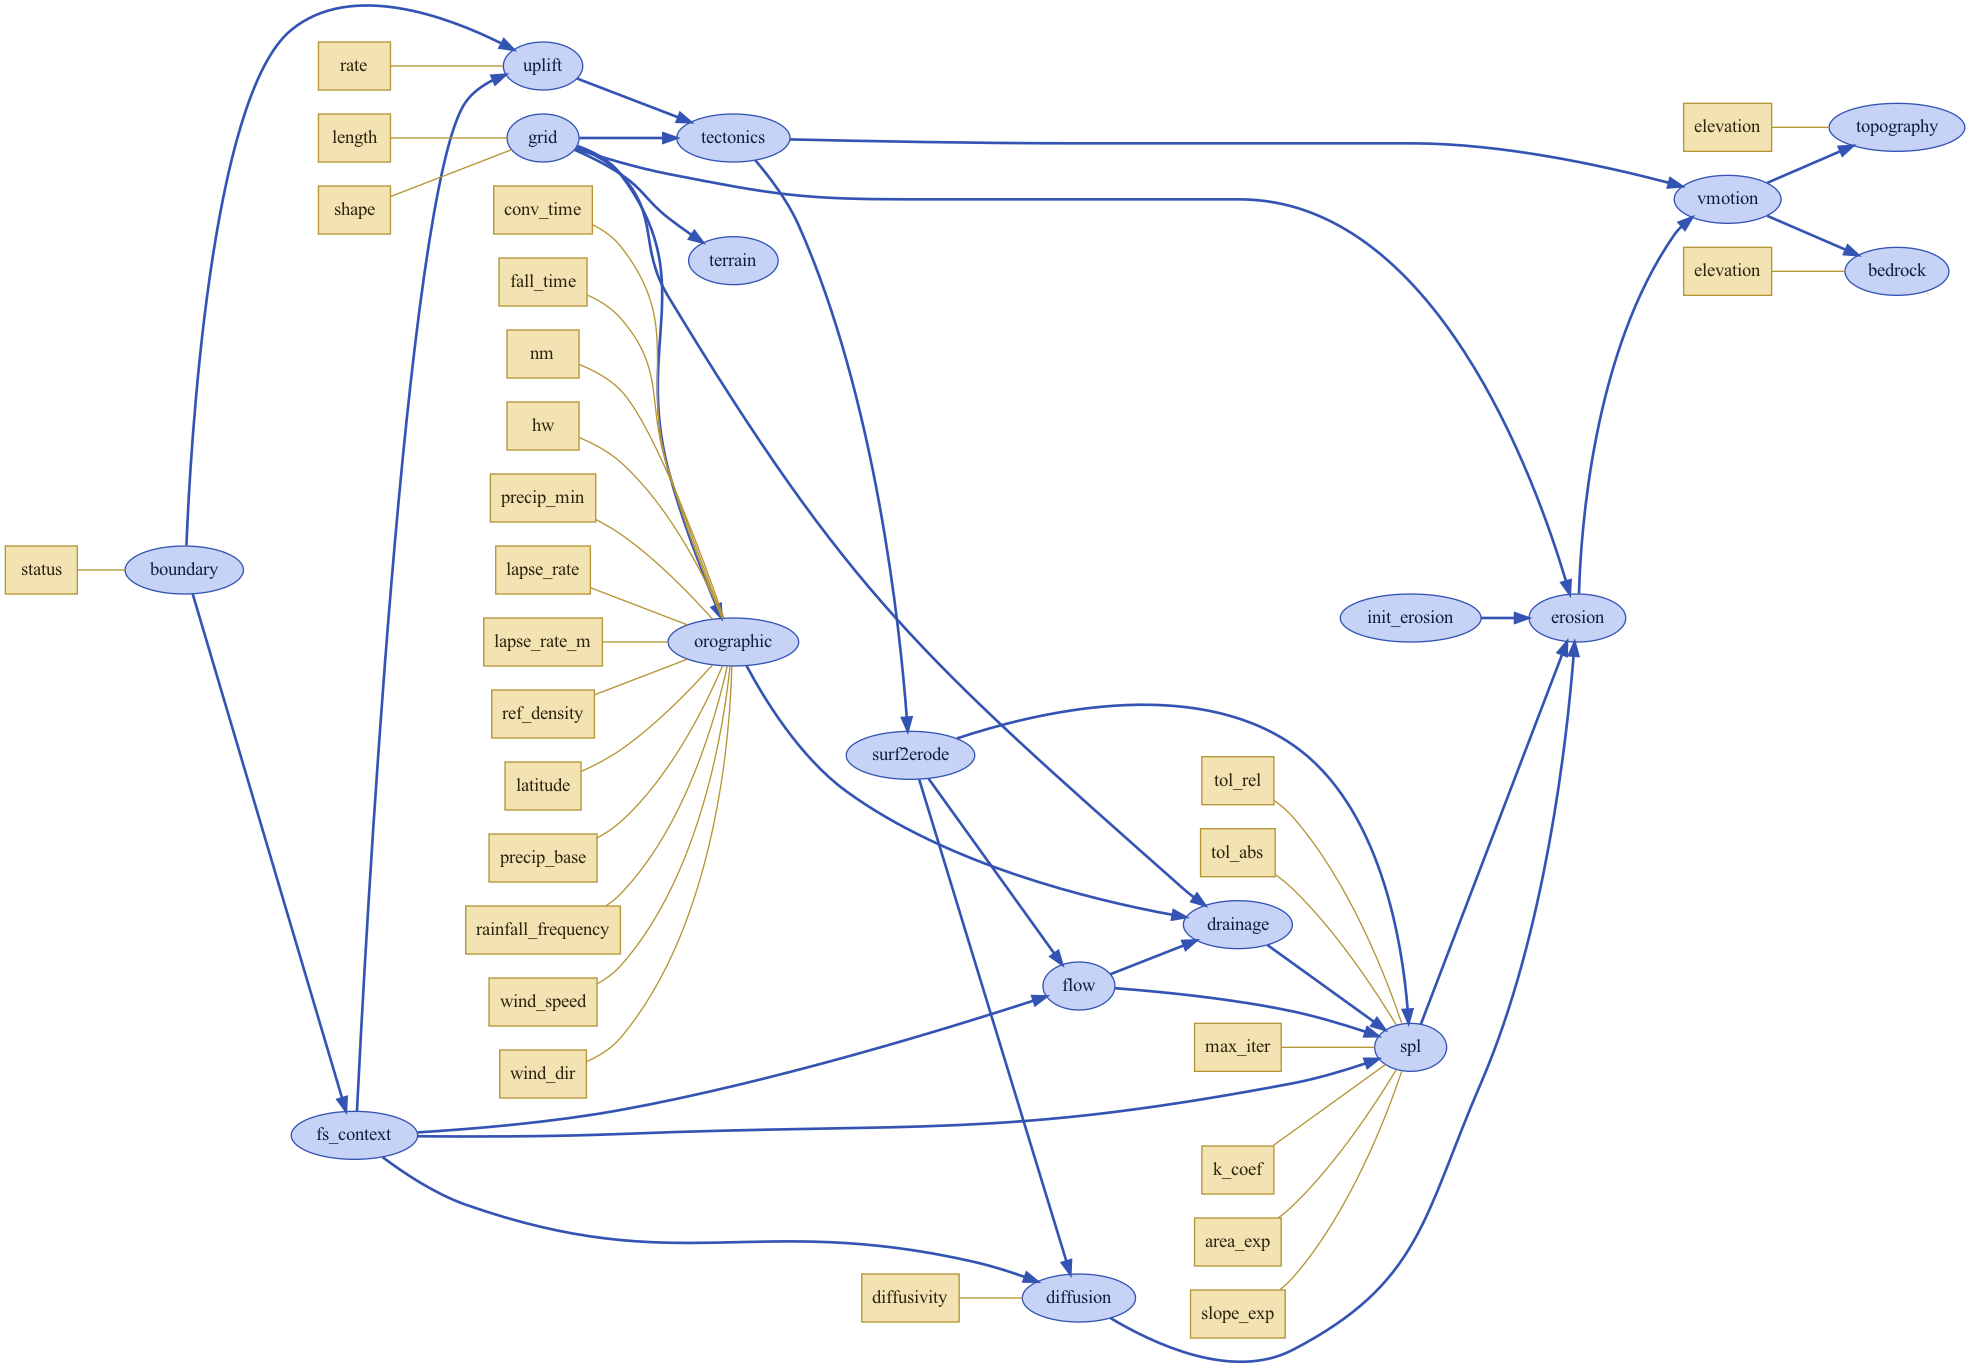

In [5]:
## Visualise xarray-simlab ##
SouthernAndesLEM.visualize(show_inputs='True')

In [6]:
## Model dimensions/grid dimensions ##
nx = 100
ny = 100
nn = nx * ny

xl = 100.e3
yl = 100.e3

BoundaryCondition = ['looped', 'looped', 'fixed_value', 'fixed_value']

## Model time and time stepping ##
EndTime_1 = 5e6
EndTime_2 = 5e6
EndTime_3 = 8e6
TimeSteps_1 = 10001
TimeSteps_2 = 10001
TimeSteps_3 = 16001

# EndTime = 1e6
# TimeSteps = 1001
ModelTime_1 = np.linspace(0., EndTime_1, TimeSteps_1)
ModelTime_2 = np.linspace(0., EndTime_2, TimeSteps_2)
ModelTime_3 = np.linspace(0., EndTime_3, TimeSteps_3)

PlotStep = 100

## Tectonics ##
k_coef= 2.5e-5
area_exp = 0.4
slope_exp = 1.0
diffusion_diffusivity = 0.


## Orographic ##
lapse_rate = -5.4 #mean lapse rate of area not too far away 
lapse_rate_m = -6.5 #left default
ref_density = 7.4e-3  #left default
rainfall_frequency = 9 #number of 1 hour storms per day estimation
latitude = 46  #latitude around the area north in the Patagonian Andes
precip_base =  1e-4 #not sure if I should change this or not
wind_speed = 10 #base to start with 
wind_dir = 270  # estimated direction given weather info 
precip_min = 0.1 #chatgpt value so could be wrong
conv_time = 2000 #2000 thesis value
fall_time = 2000 #2000 thesis value
nm = 0.003  #0.03 #thesis value
hw = 5000  #


## Initial topography ##
WhiteNoiseLevel = 50 # in [m], amplitude of noise

## Seed for Reproducibility ##
RandomSeed = 1410

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
nx, ny = 100, 100  # Example values; adjust as needed
nn = nx * ny  # Total number of nodes

# Initialize an array to store elevations
InitialTopography = np.zeros(nn)

# Assign elevations based on node indices (using slicing and grid structure)
InitialTopography[:int(0.25 * nn)] = 400    # First 25% of nodes
InitialTopography[int(0.25 * nn):int(0.5 * nn)] = 3375  # Next 25% of nodes
InitialTopography[int(0.5 * nn):int(0.75 * nn)] = 2500  # Next 25% of nodes
InitialTopography[int(0.75 * nn):] = 1000  # Last 25% of nodes

# Adding random noise to the elevations
np.random.seed(42)  # For reproducibility
WhiteNoiseLevel = 50  # Standard deviation of noise
Noise = np.random.normal(0, WhiteNoiseLevel, nn)
InitialTopography += Noise  # Add noise to the elevations

# Reshape the 1D array to 2D with shape (ny, nx)
InitialTopography_2D = InitialTopography.reshape((ny, nx))

# Define first stage uplift rates for each region
UpliftRates = np.zeros(nn)  # Initialize uplift rates array

# Assign uplift rates to regions (using slicing or fractions of the total nodes)
UpliftRates[:int(0.25 * nn)] = 0.01    # First 25% of nodes
UpliftRates[int(0.25 * nn):int(0.5 * nn)] = 0.041  # Next 25% of nodes
UpliftRates[int(0.5 * nn):int(0.75 * nn)] = 0.035  # Next 25% of nodes
UpliftRates[int(0.75 * nn):] = 0.02  # Last 25% of nodes

# Adding random noise to the uplift rates for realism (optional)
np.random.seed(42)  # For reproducibility
UpliftNoise = np.random.normal(0, 0.005, nn)  # Small noise in uplift rates
UpliftRates += UpliftNoise  # Add noise to the uplift rates

# Reshape the 1D array to 2D with shape (ny, nx)
UpliftRates_2D = UpliftRates.reshape((ny, nx))

# Rotate both topography and uplift rates 90 degrees anti-clockwise
RotatedTopography_2D = np.rot90(InitialTopography_2D, k=1)
RotatedUpliftRates_2D = np.rot90(UpliftRates_2D, k=1)



Running simulation for conv_time = 200.0 secs


             0% | initialize 

Mean Topography for conv_time = 200.0 hrs: 1515.757300643414
  - Mean elevation at final time: 1236.39 m
  - Max precipitation at final time: 14.39 mm/hr


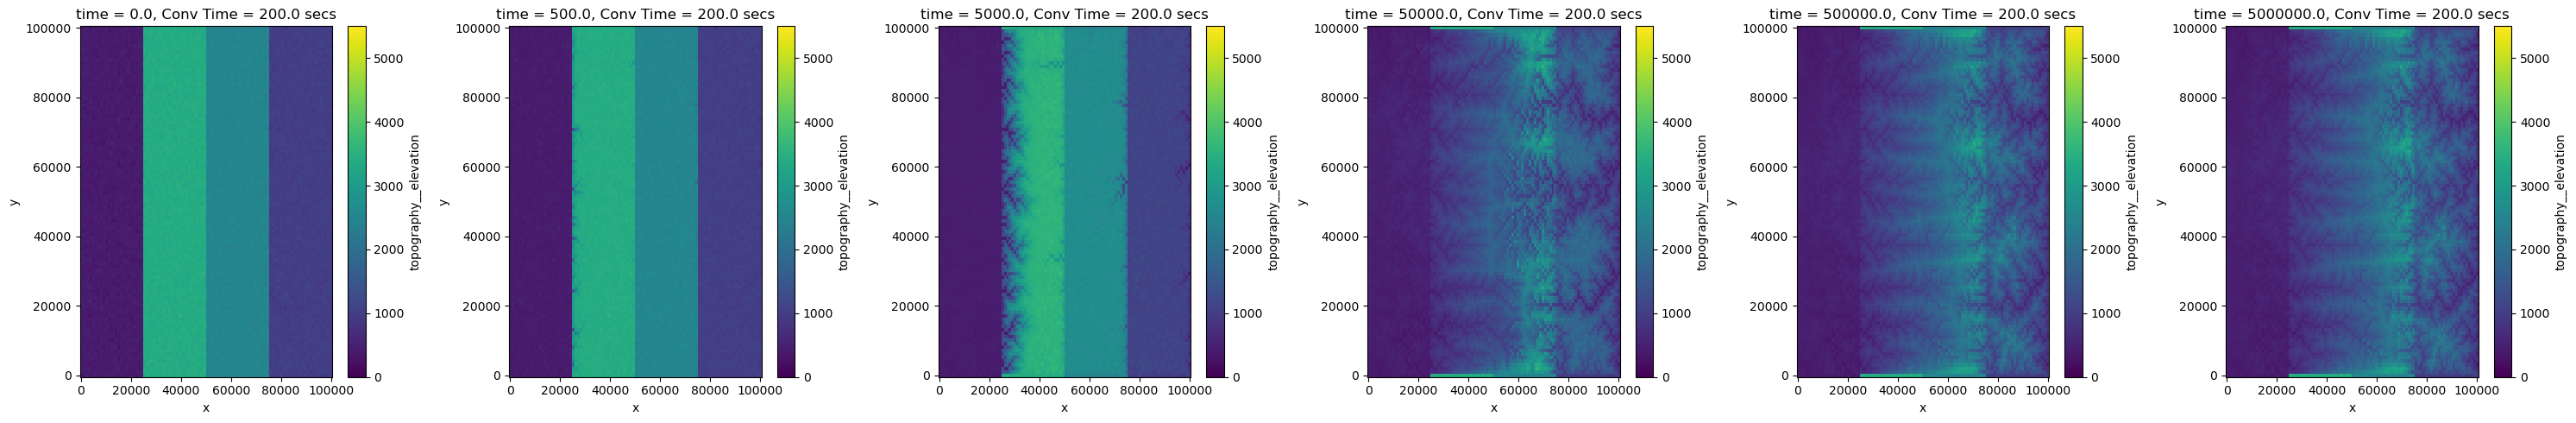

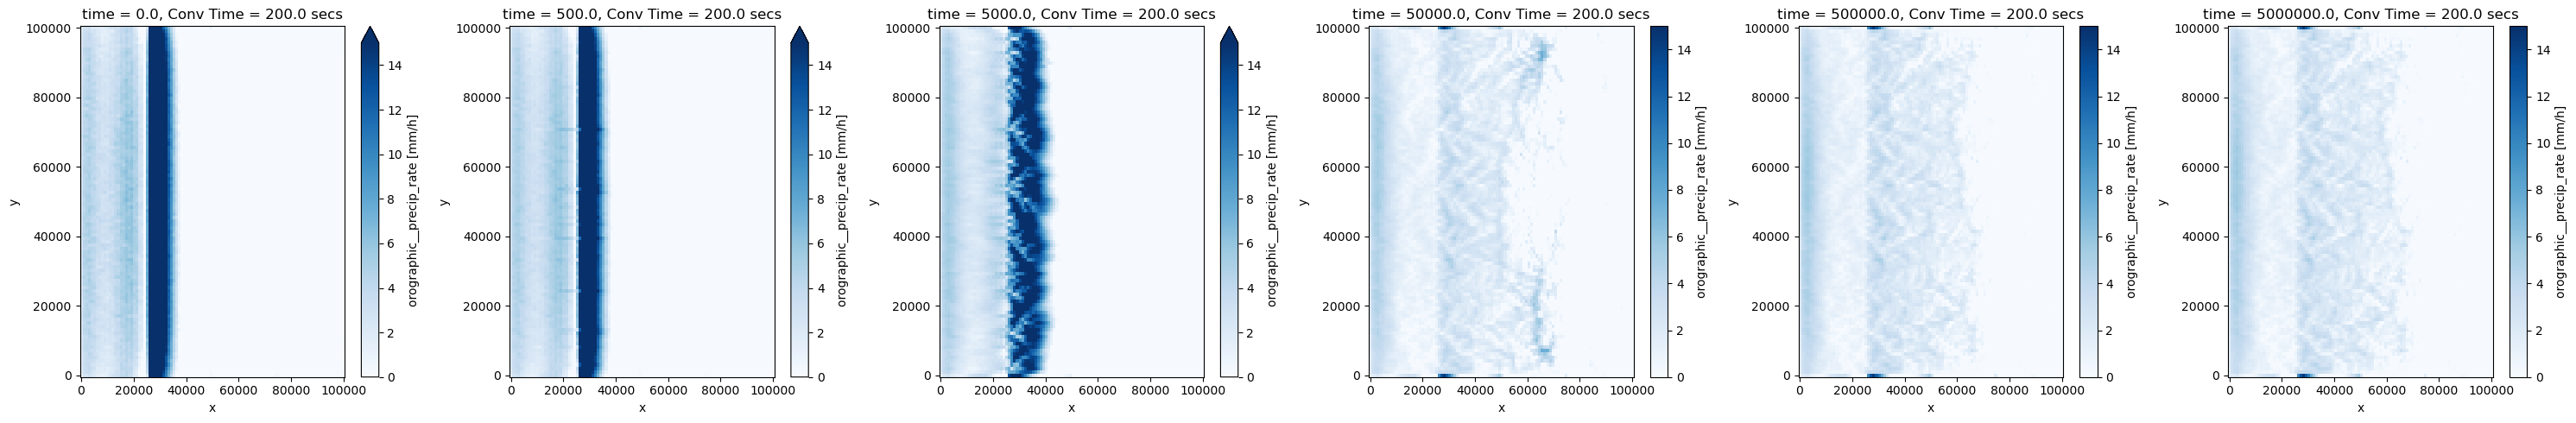

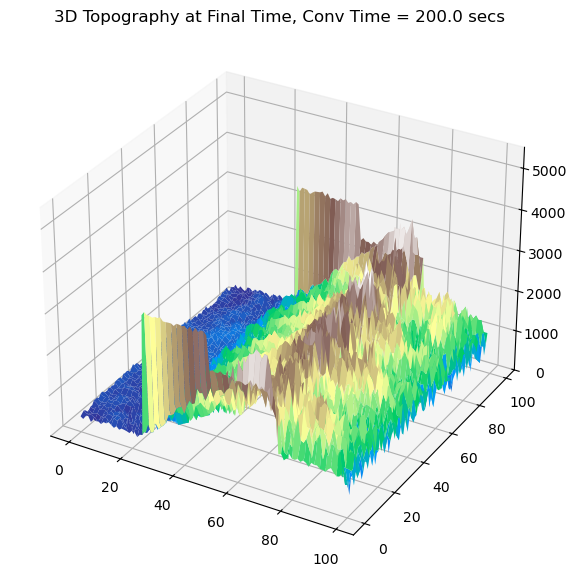

Running simulation for conv_time = 400.0 secs


             0% | initialize 

Mean Topography for conv_time = 400.0 hrs: 1520.195586267894
  - Mean elevation at final time: 1235.86 m
  - Max precipitation at final time: 9.37 mm/hr


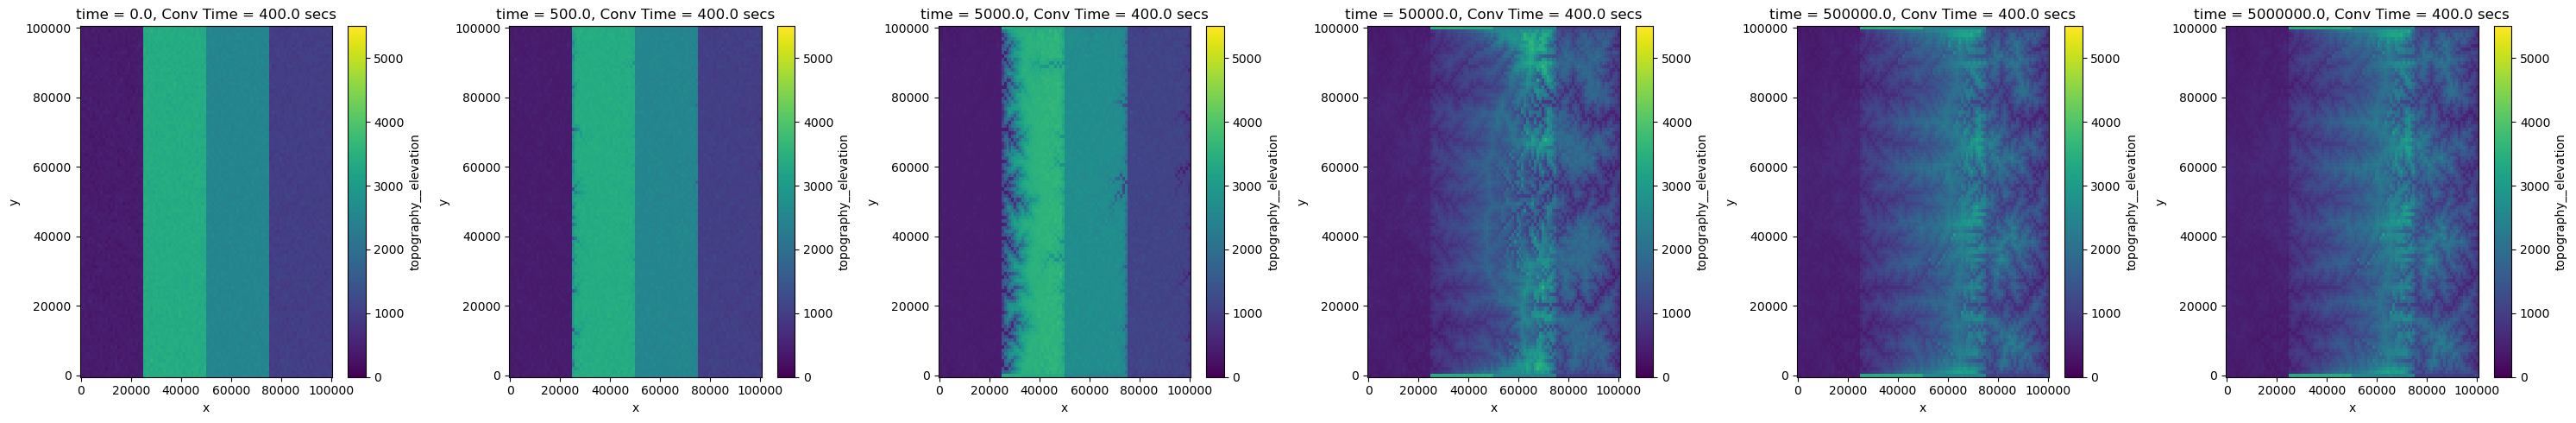

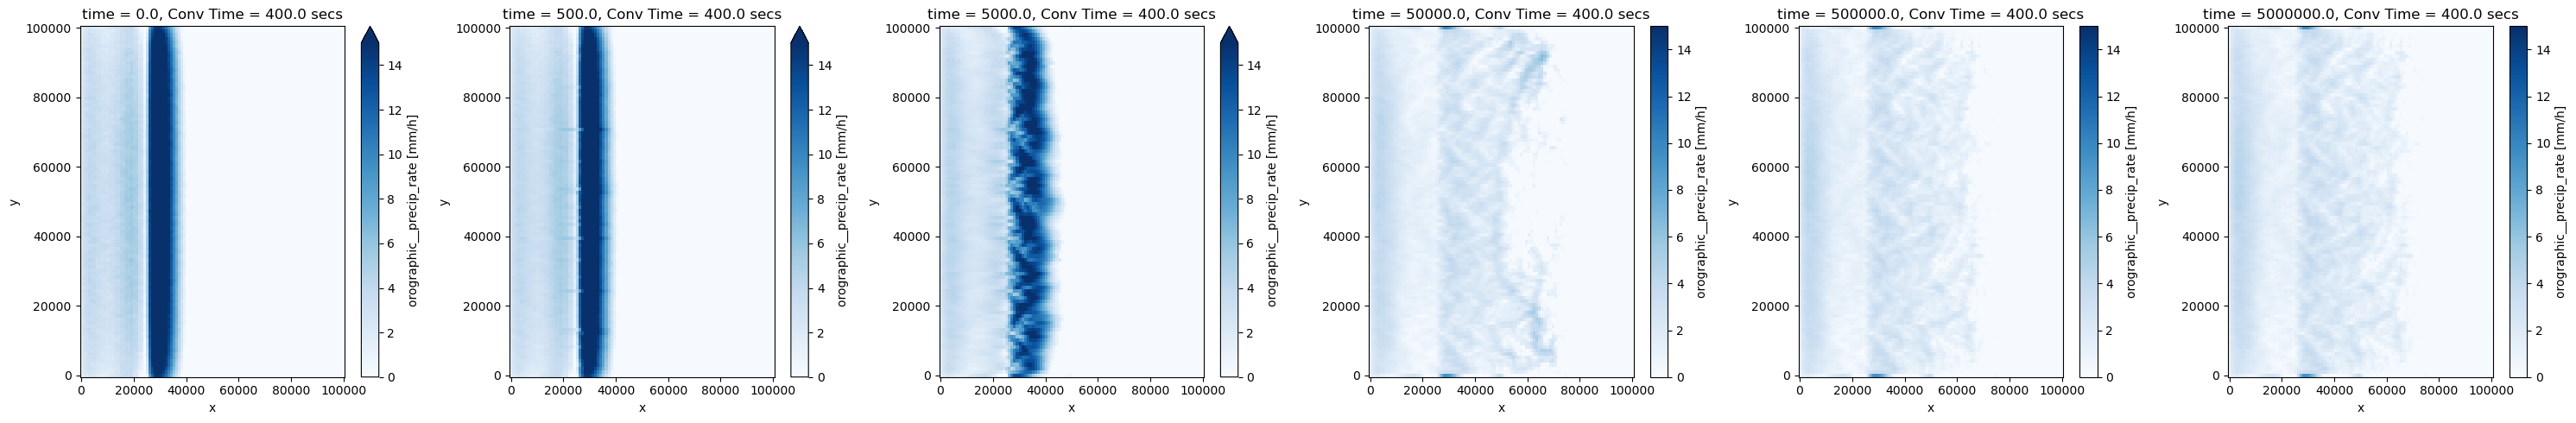

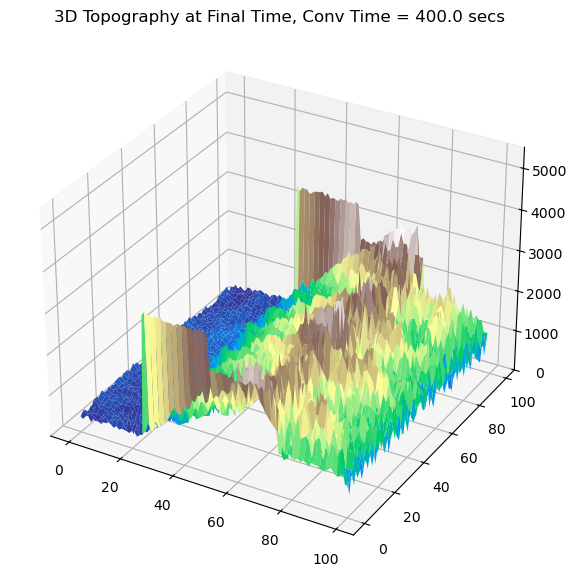

Running simulation for conv_time = 600.0 secs


             0% | initialize 

Mean Topography for conv_time = 600.0 hrs: 1522.8394476028084
  - Mean elevation at final time: 1233.84 m
  - Max precipitation at final time: 7.18 mm/hr


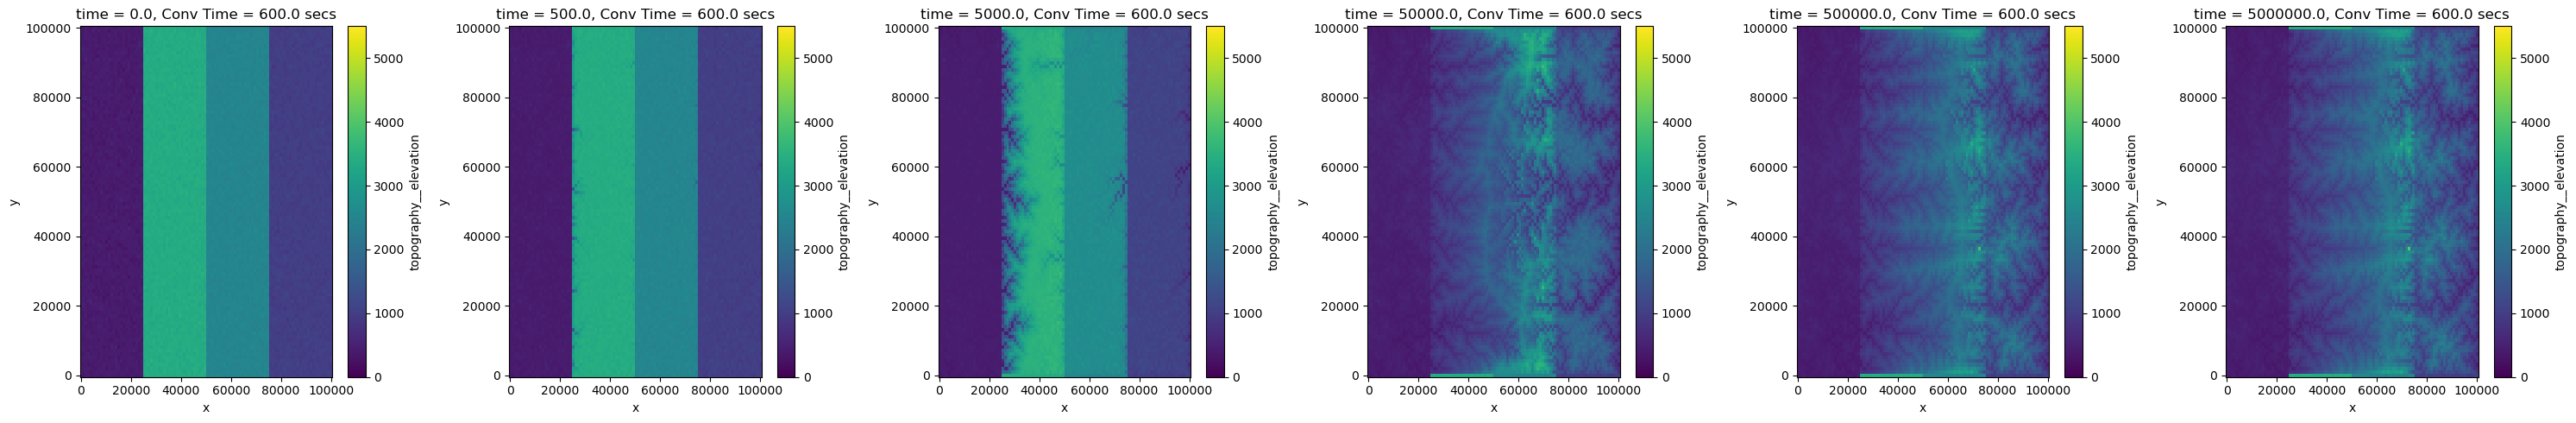

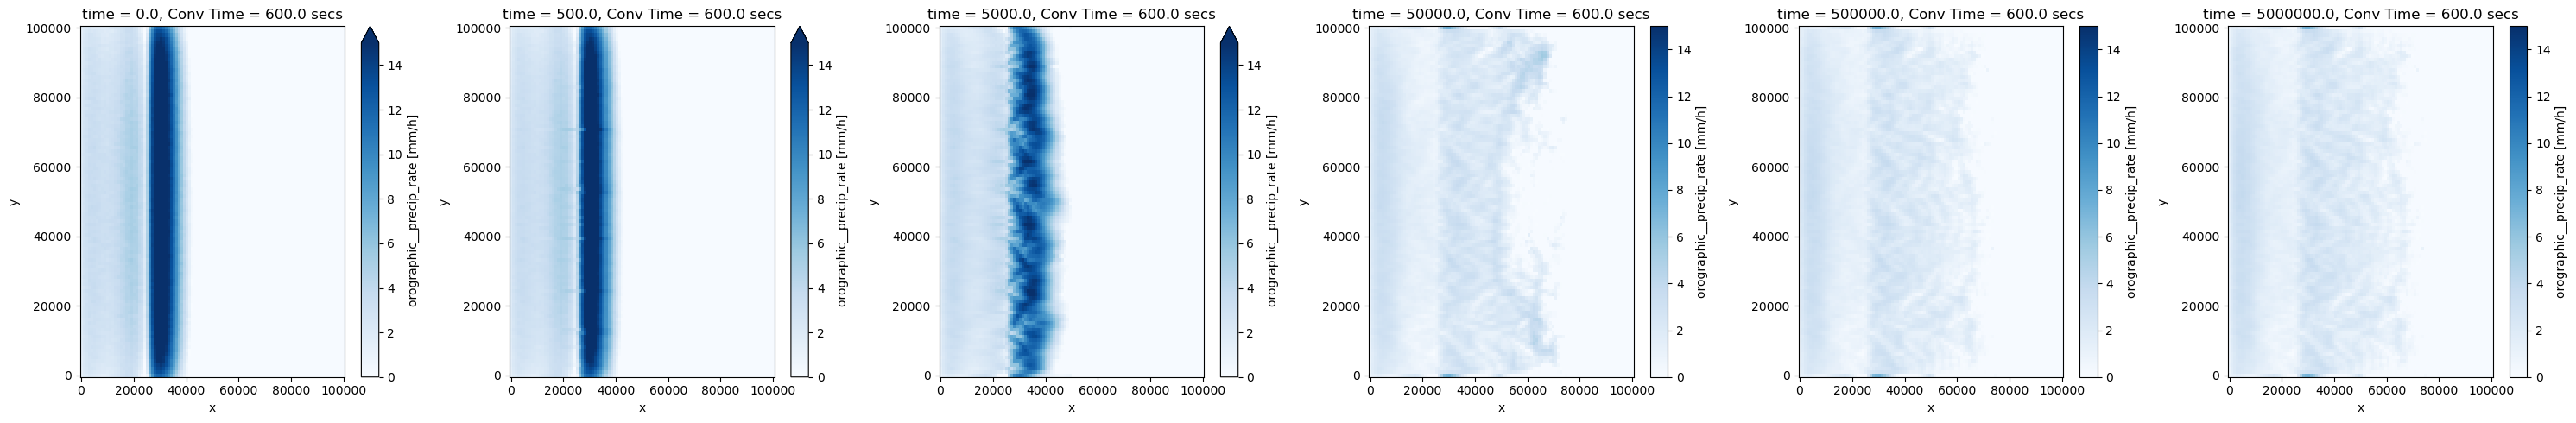

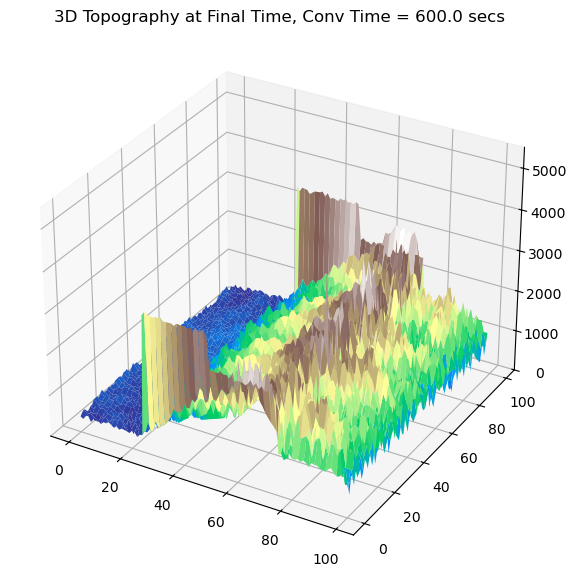

Running simulation for conv_time = 800.0 secs


             0% | initialize 

Mean Topography for conv_time = 800.0 hrs: 1525.5891315536358
  - Mean elevation at final time: 1234.36 m
  - Max precipitation at final time: 5.99 mm/hr


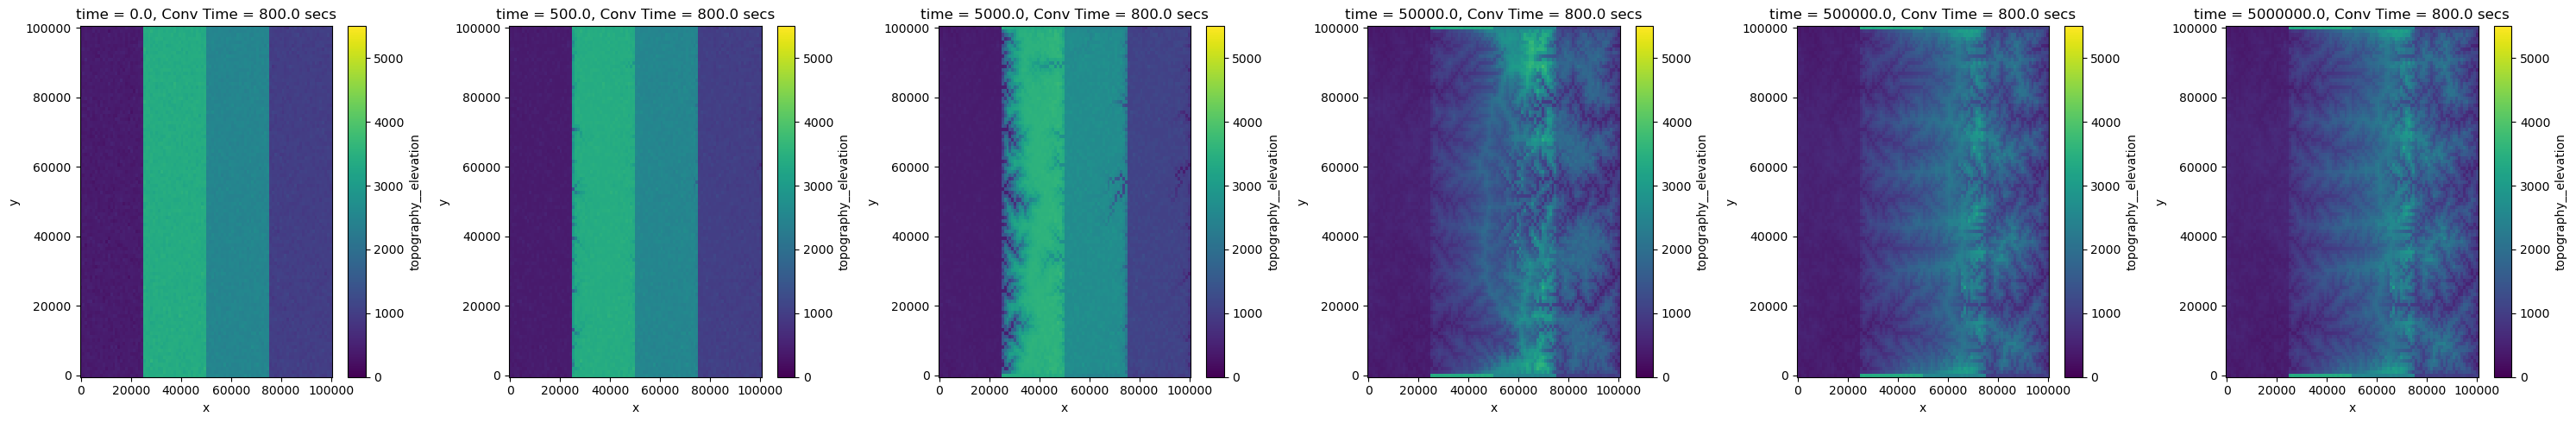

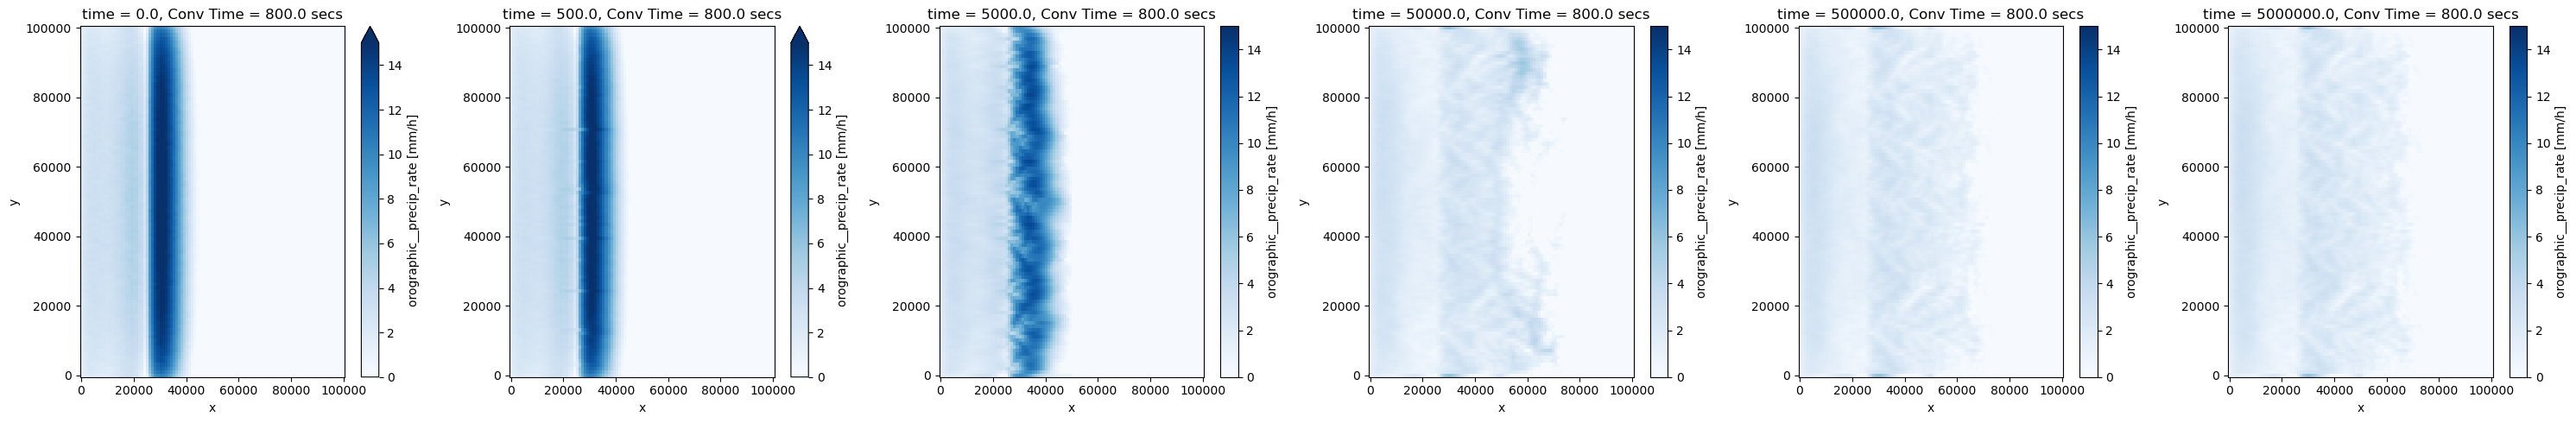

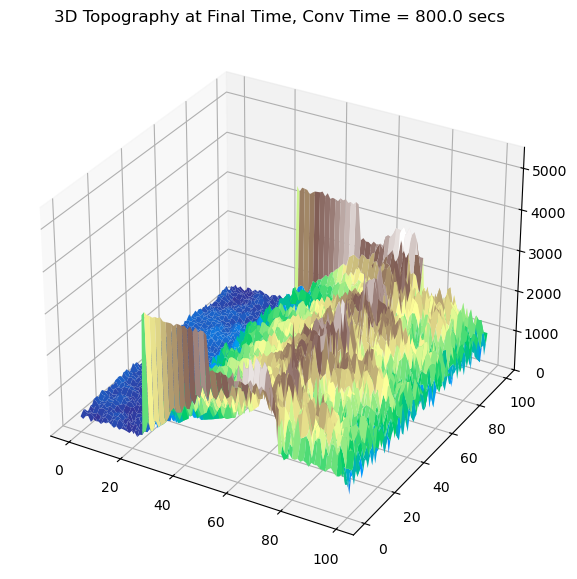

Running simulation for conv_time = 1000.0 secs


             0% | initialize 

Mean Topography for conv_time = 1000.0 hrs: 1526.1431275668294
  - Mean elevation at final time: 1231.21 m
  - Max precipitation at final time: 5.18 mm/hr


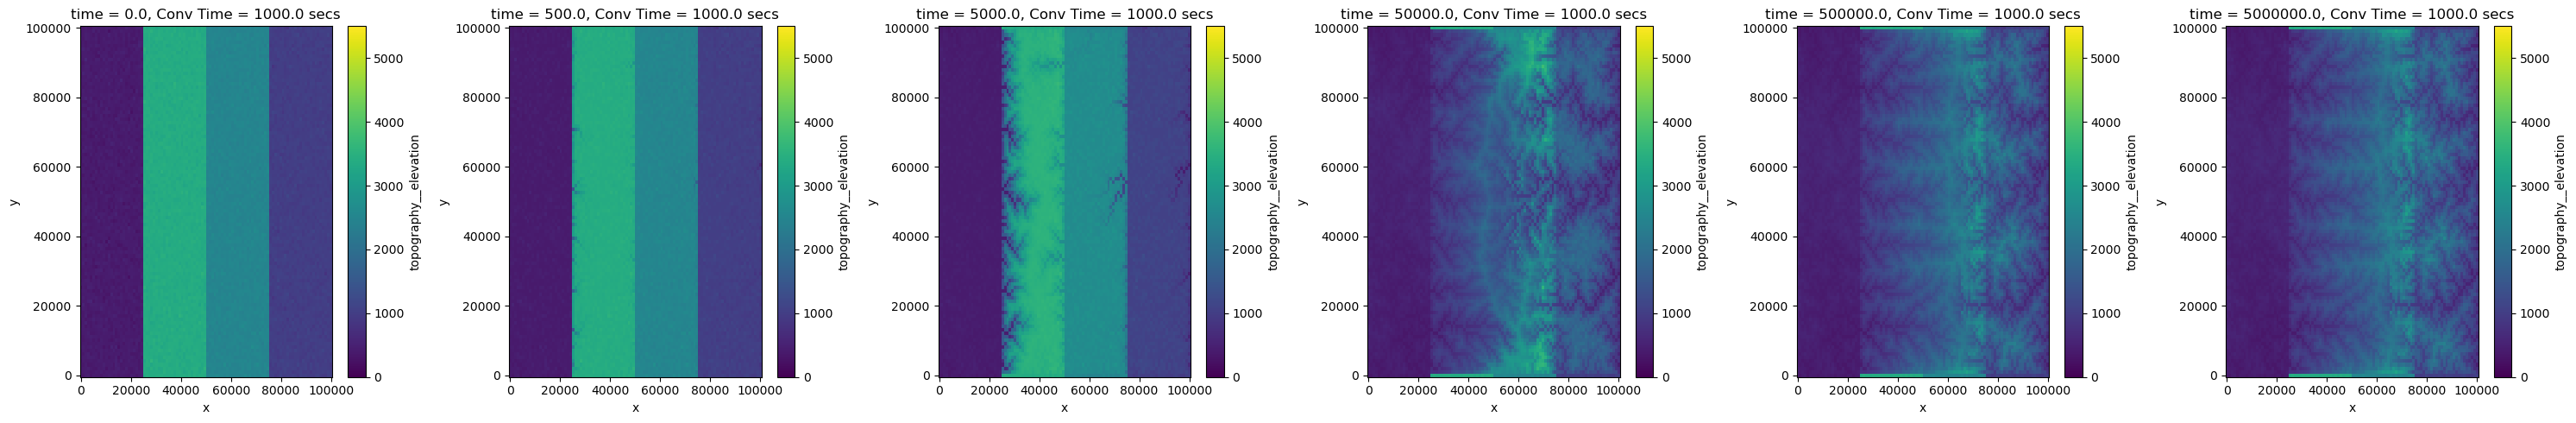

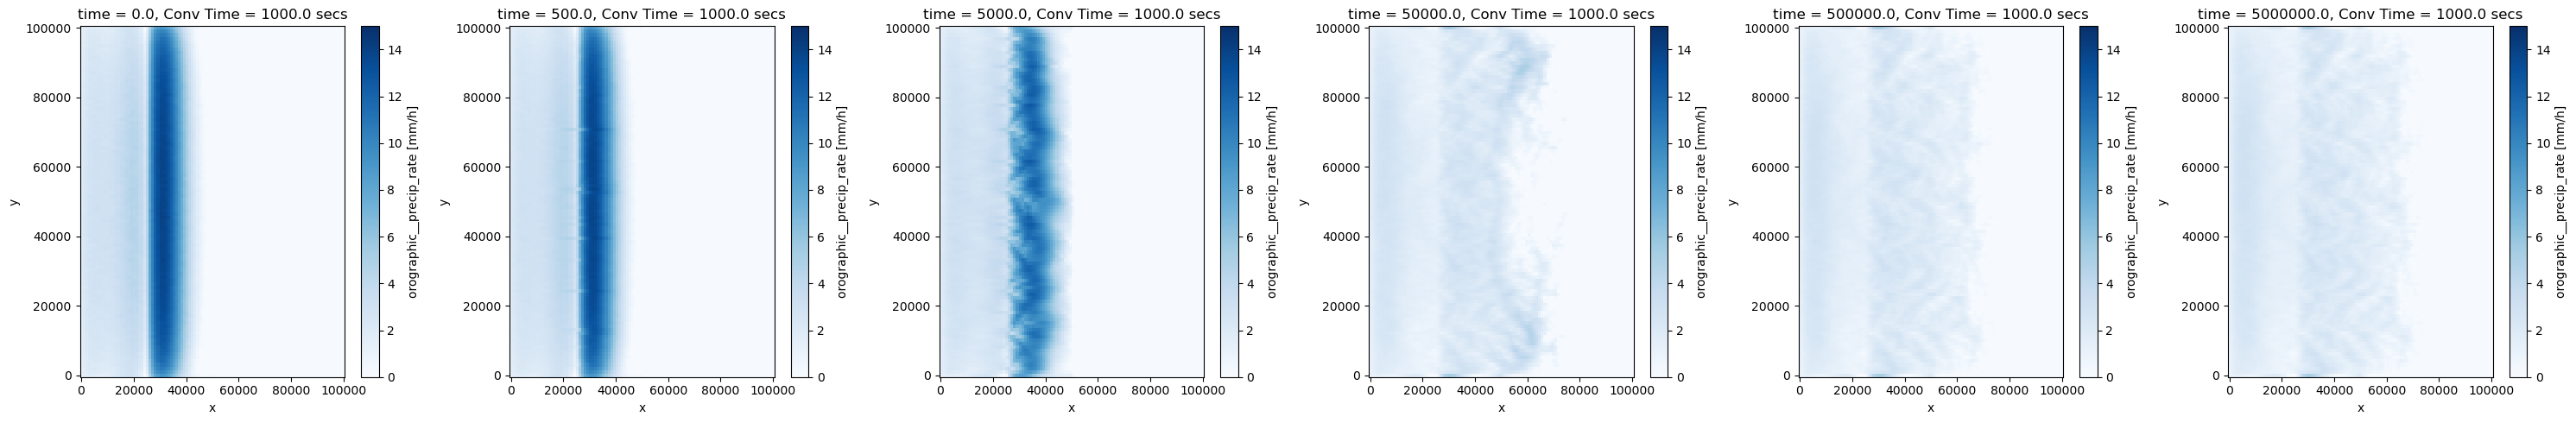

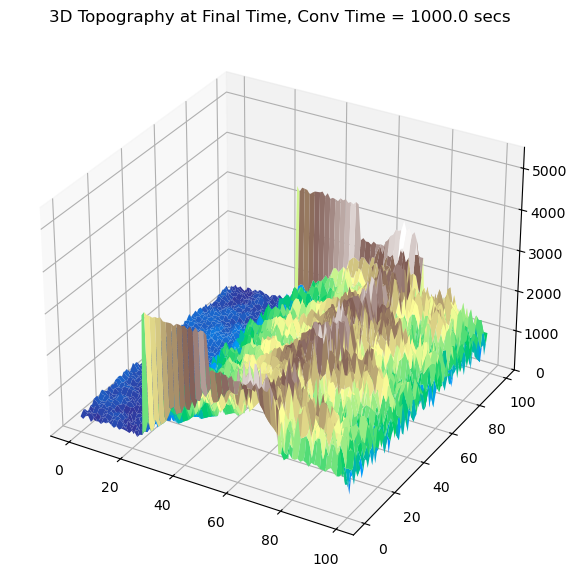

Running simulation for conv_time = 1200.0 secs


             0% | initialize 

Mean Topography for conv_time = 1200.0 hrs: 1525.2974631192164
  - Mean elevation at final time: 1228.46 m
  - Max precipitation at final time: 4.59 mm/hr


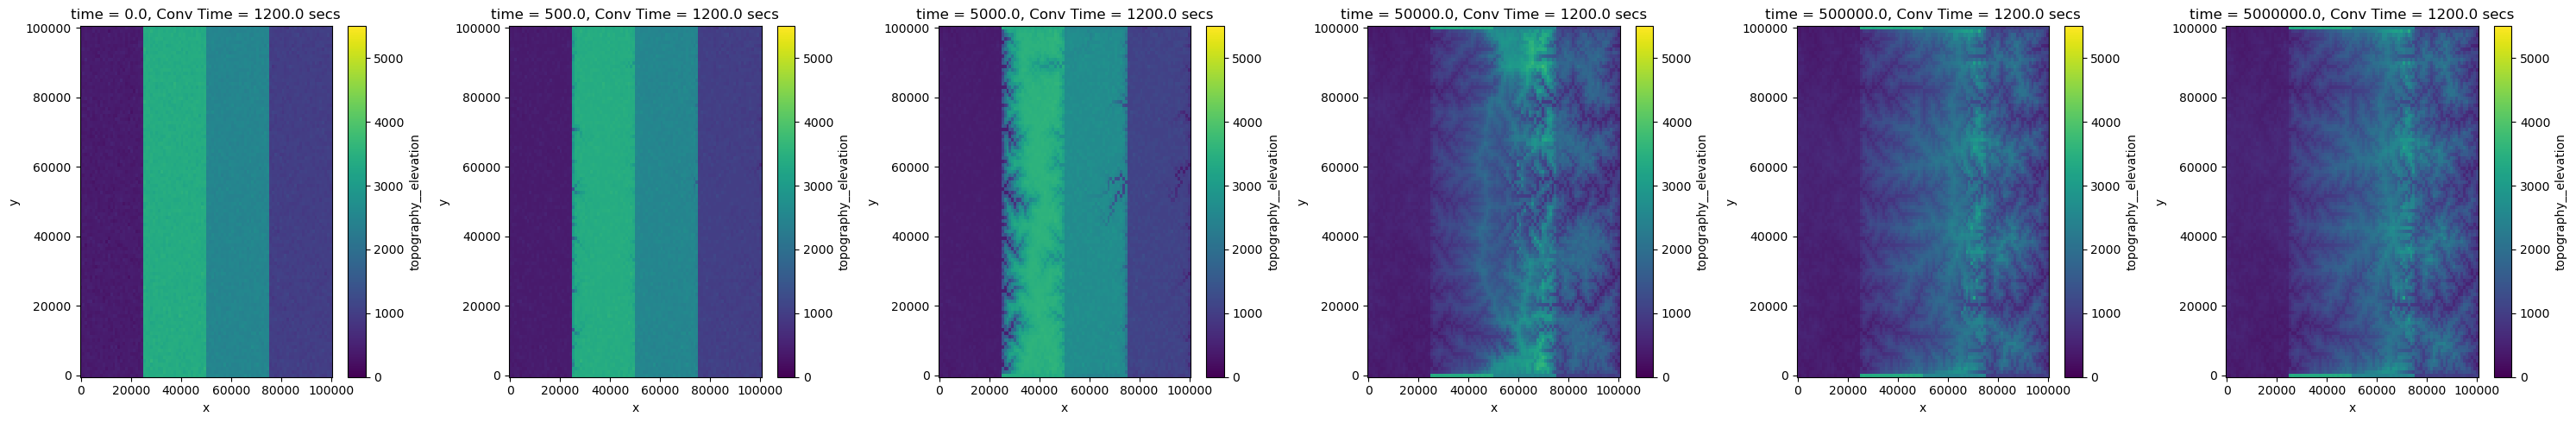

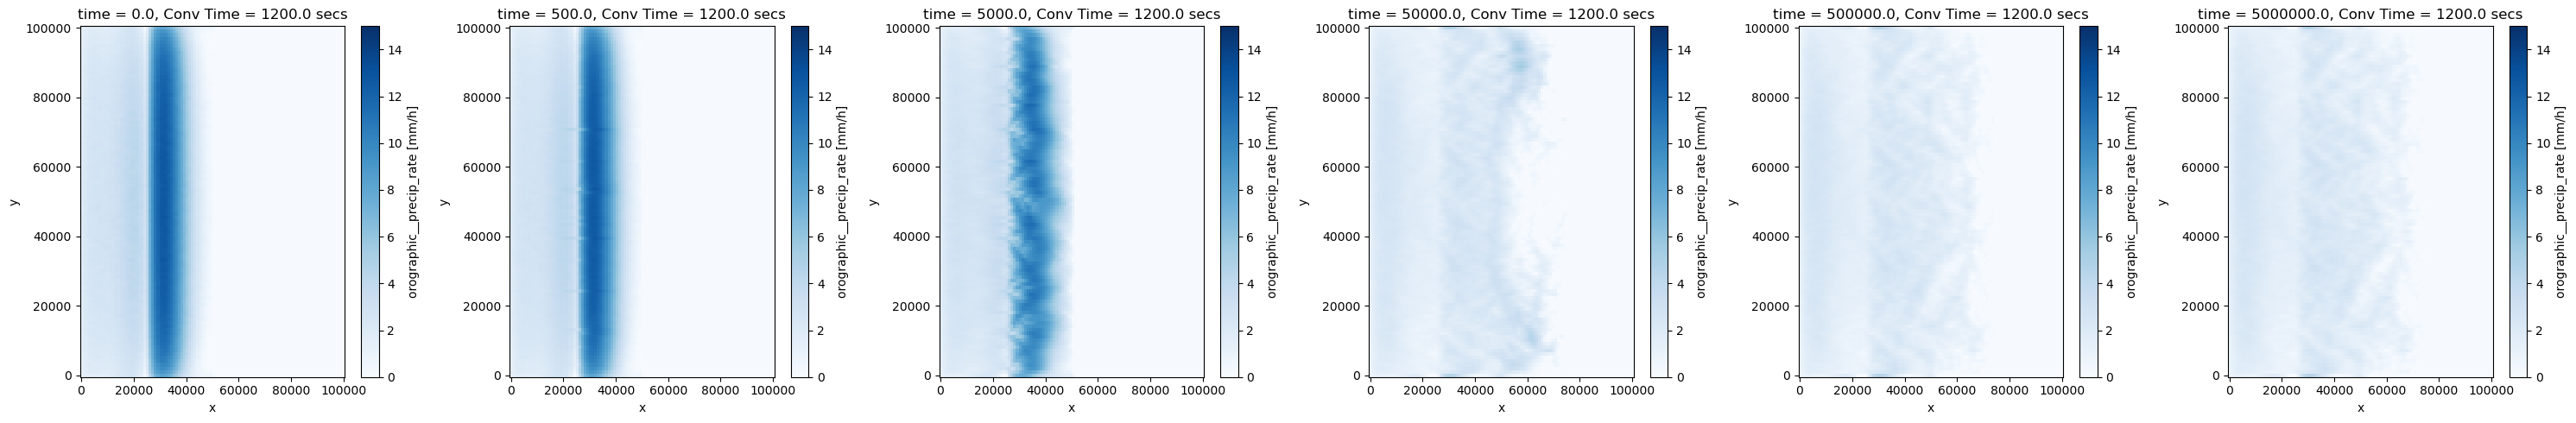

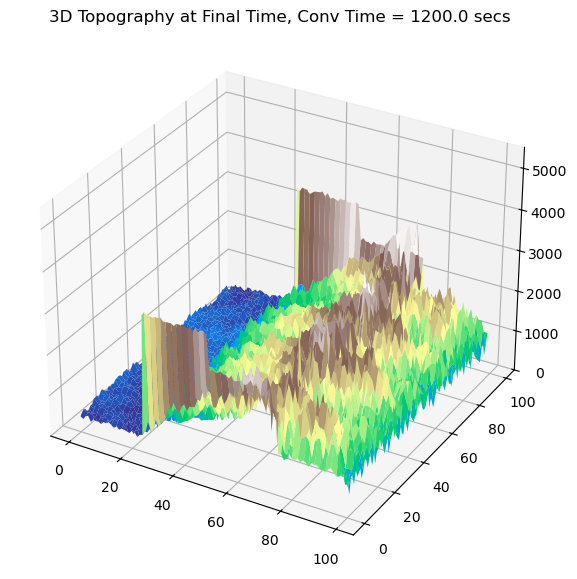

Running simulation for conv_time = 1400.0 secs


             0% | initialize 

Mean Topography for conv_time = 1400.0 hrs: 1525.455770710894
  - Mean elevation at final time: 1224.22 m
  - Max precipitation at final time: 4.15 mm/hr


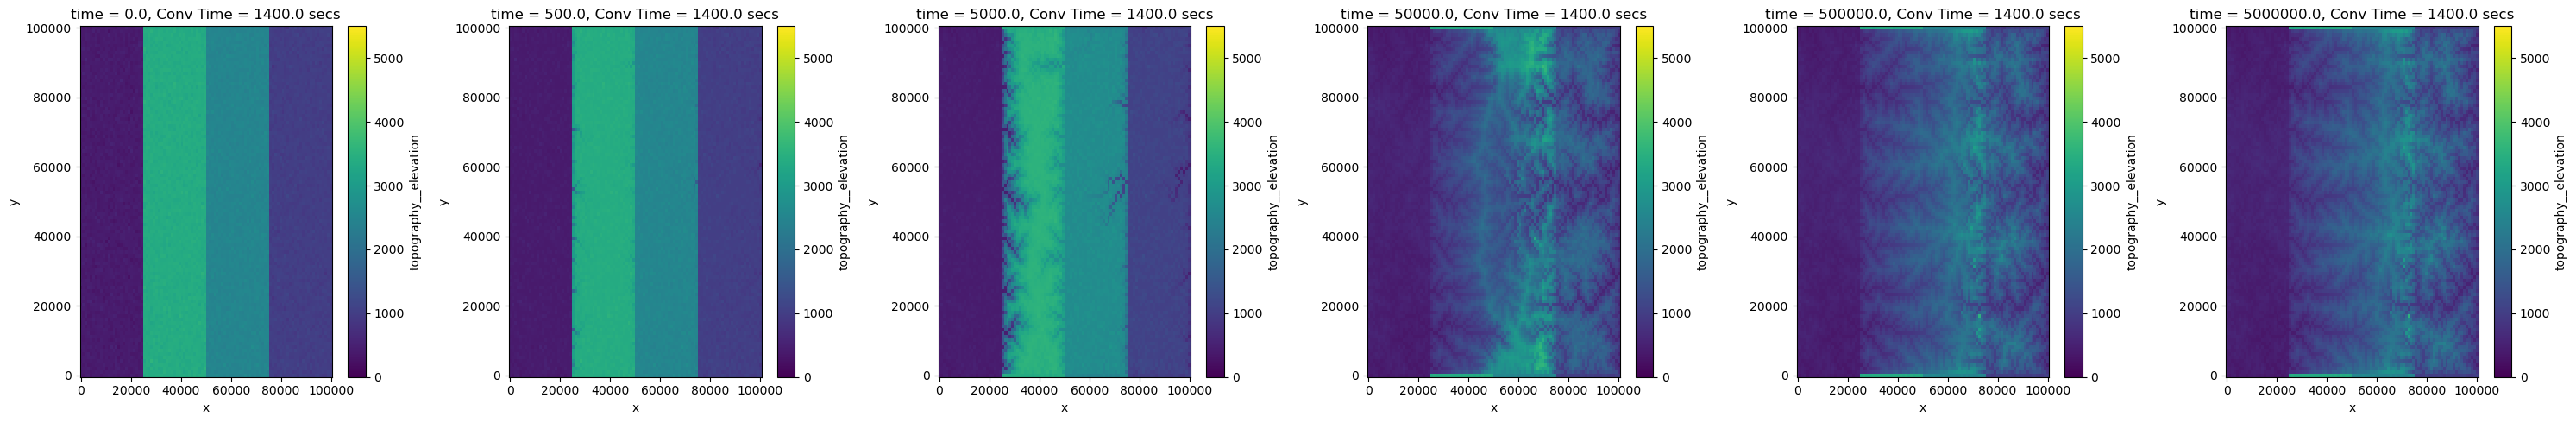

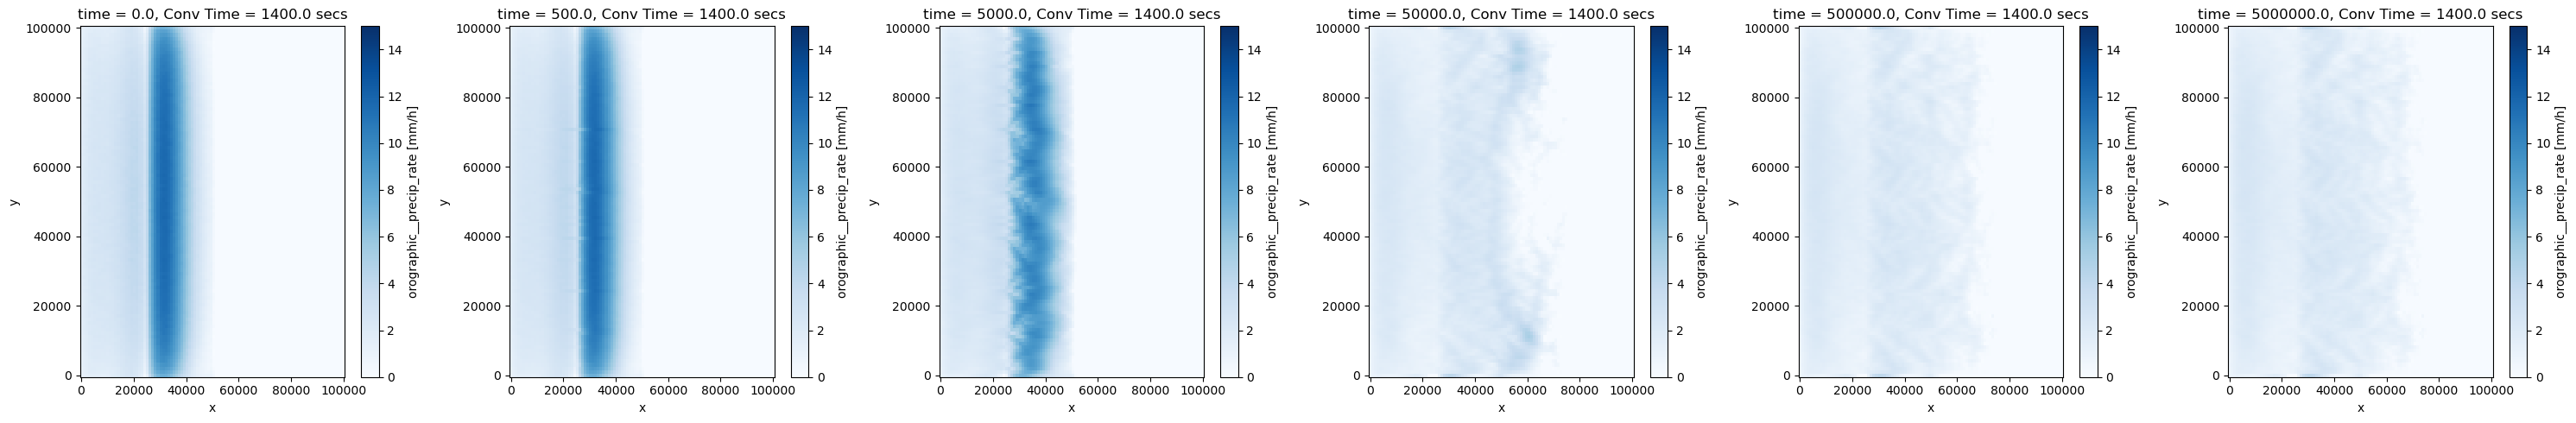

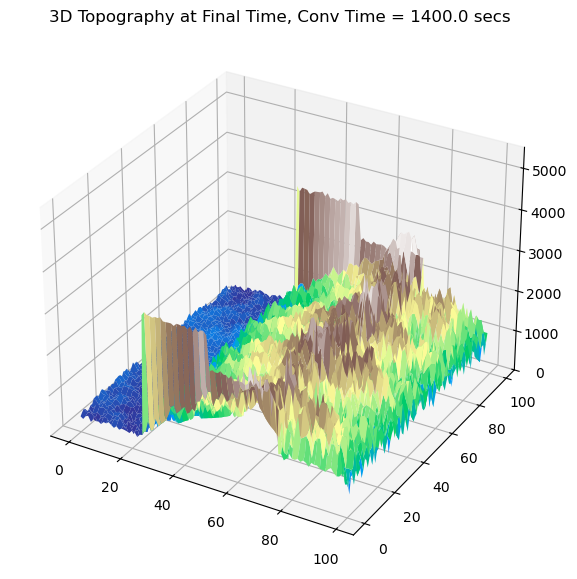

Running simulation for conv_time = 1600.0 secs


             0% | initialize 

Mean Topography for conv_time = 1600.0 hrs: 1524.9762263468301
  - Mean elevation at final time: 1220.96 m
  - Max precipitation at final time: 3.79 mm/hr


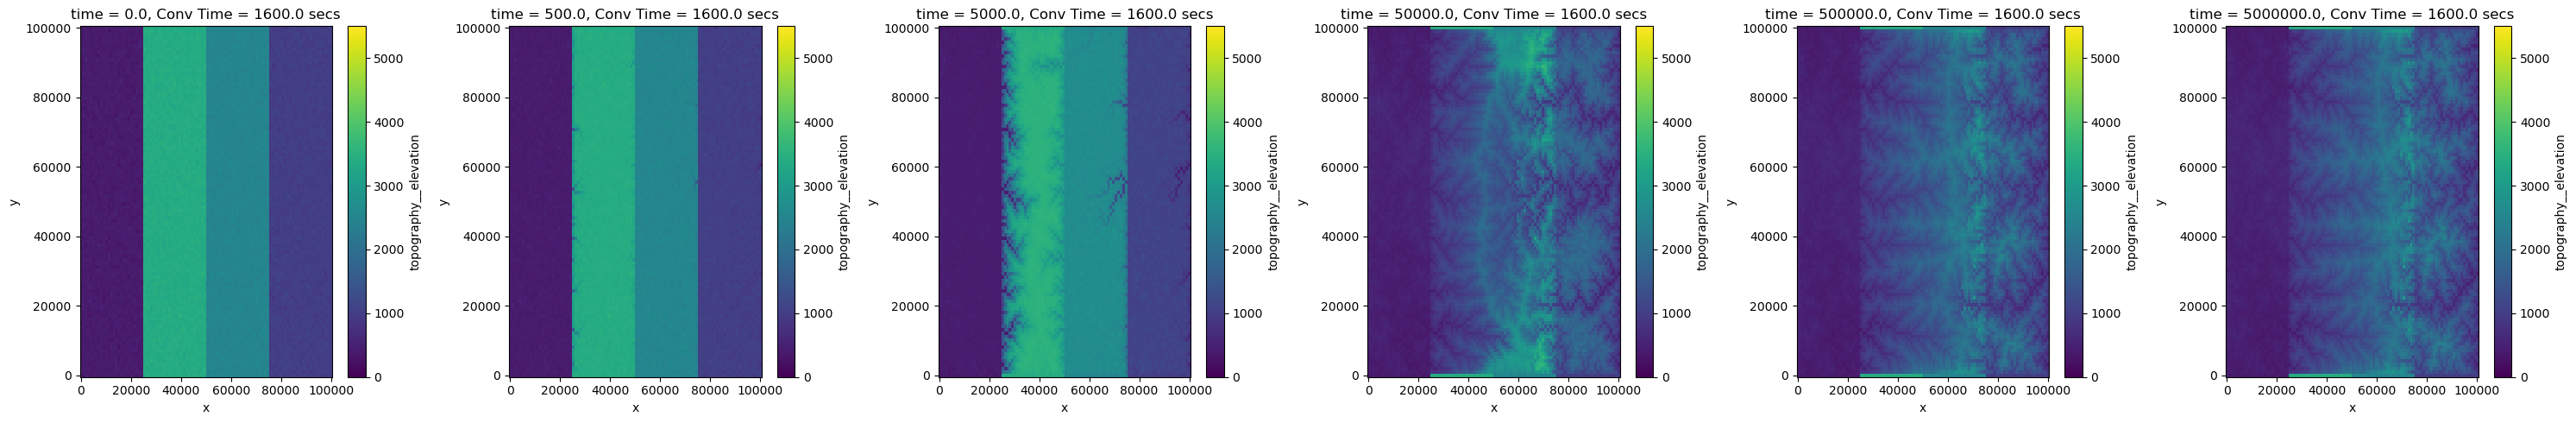

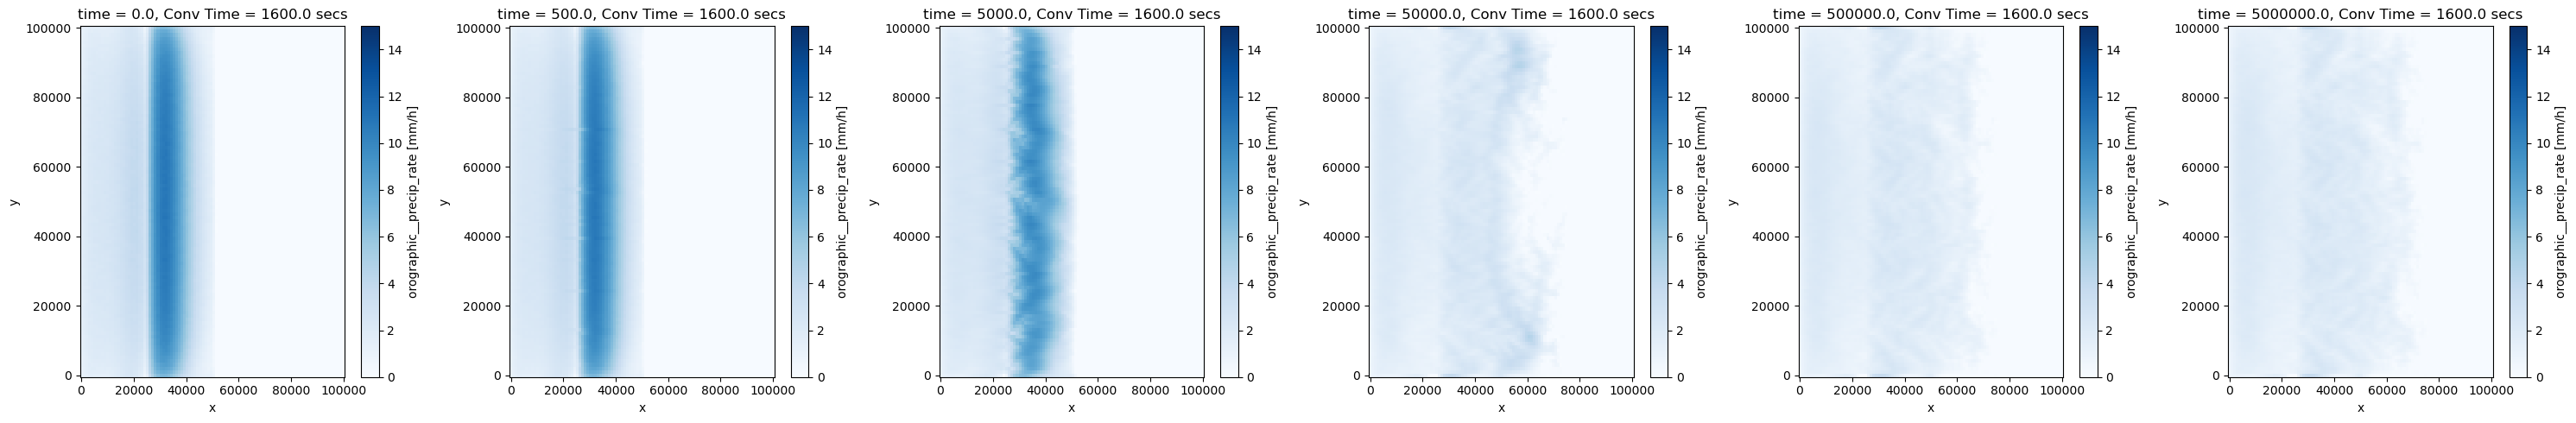

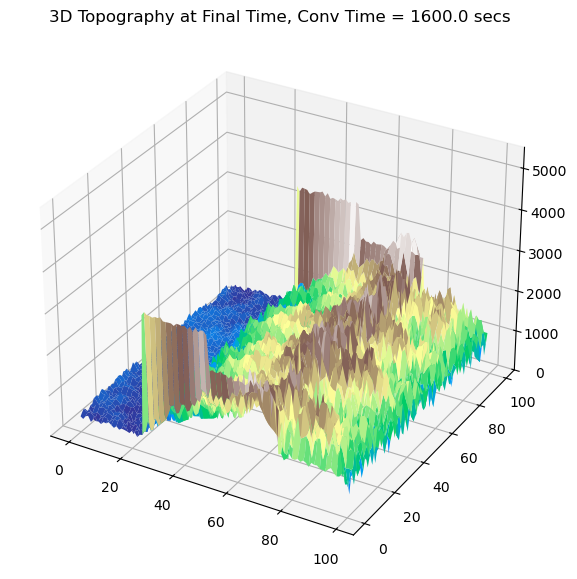

Running simulation for conv_time = 1800.0 secs


             0% | initialize 

Mean Topography for conv_time = 1800.0 hrs: 1524.531710830977
  - Mean elevation at final time: 1217.94 m
  - Max precipitation at final time: 3.50 mm/hr


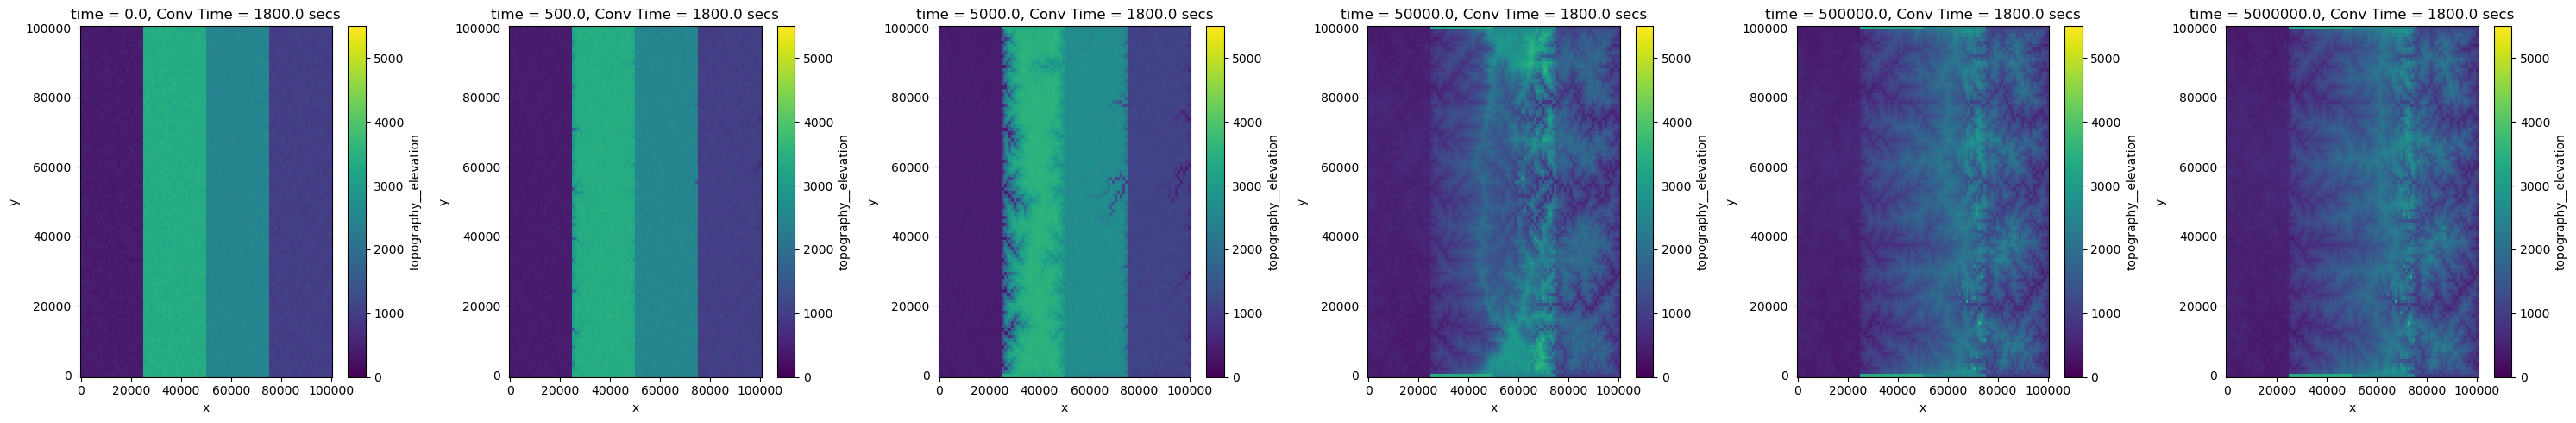

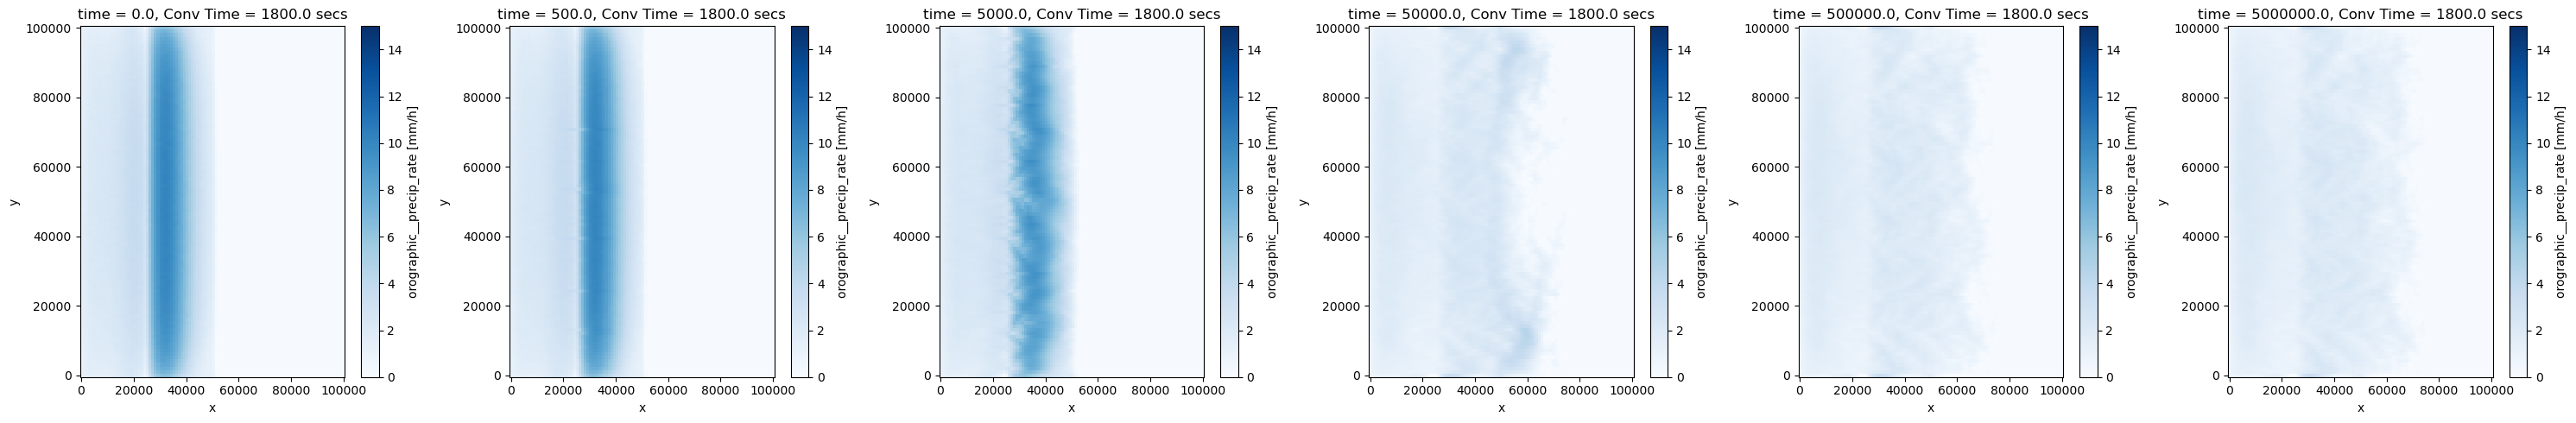

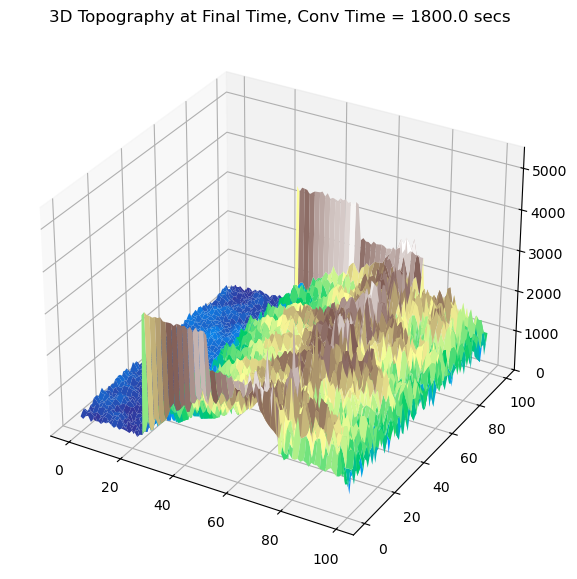

Running simulation for conv_time = 2000.0 secs


             0% | initialize 

Mean Topography for conv_time = 2000.0 hrs: 1524.875224259364
  - Mean elevation at final time: 1216.61 m
  - Max precipitation at final time: 3.31 mm/hr


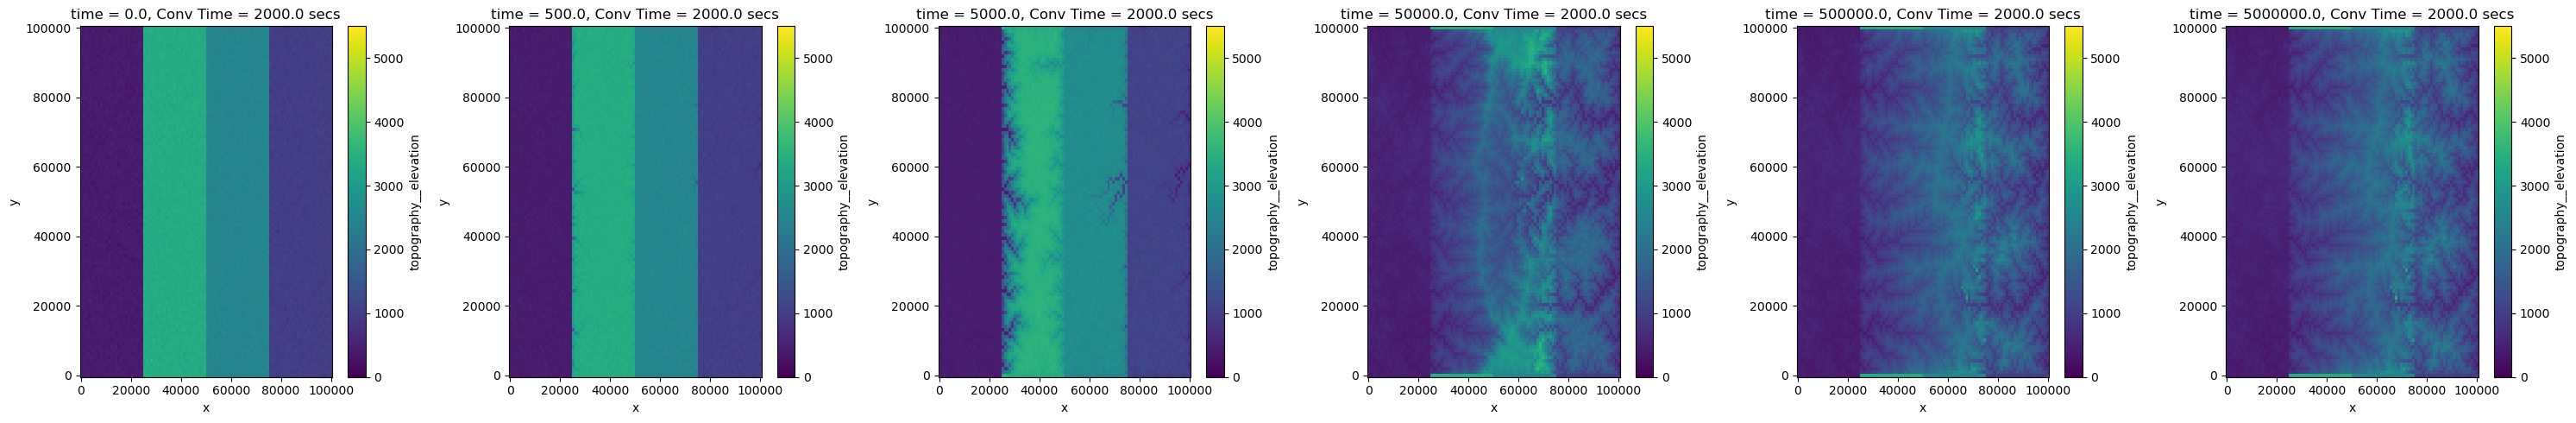

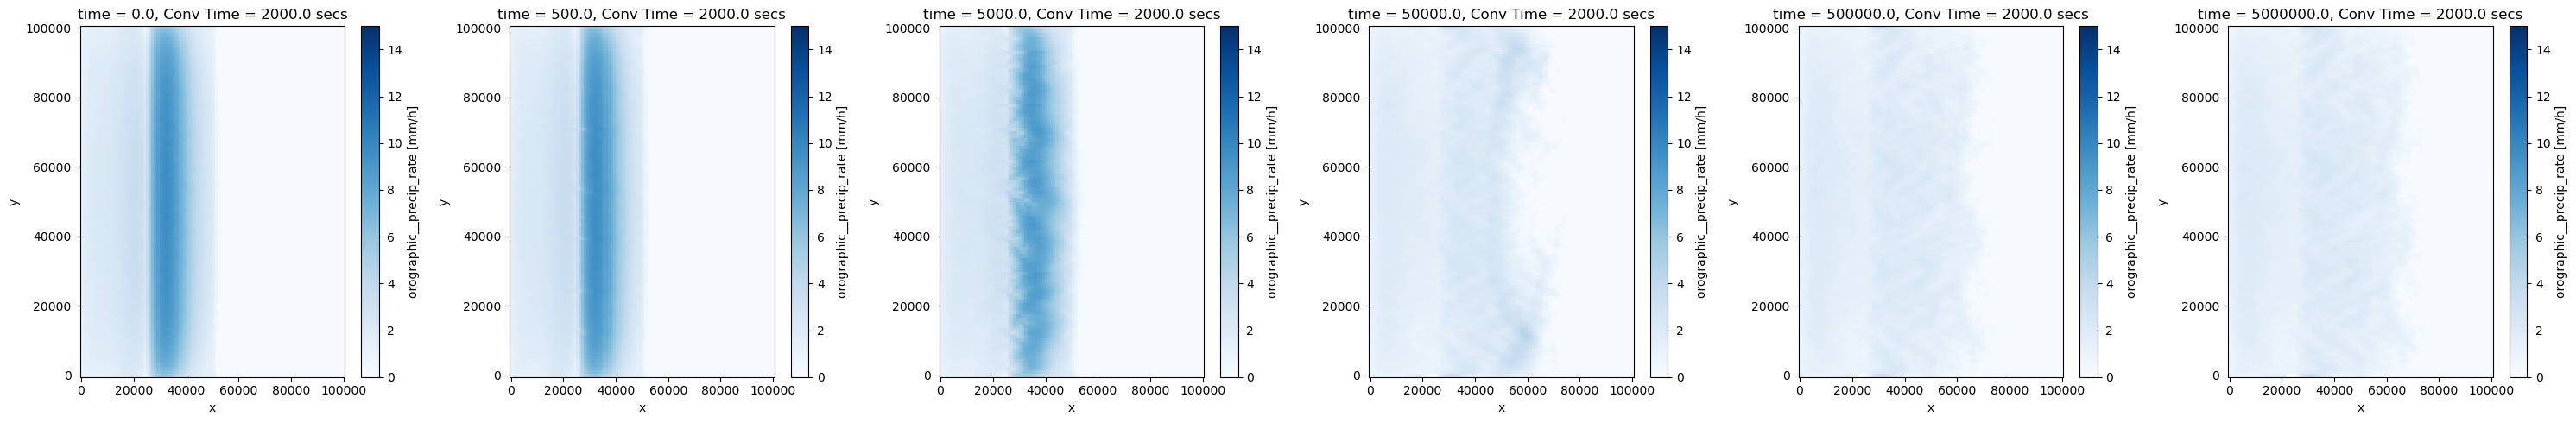

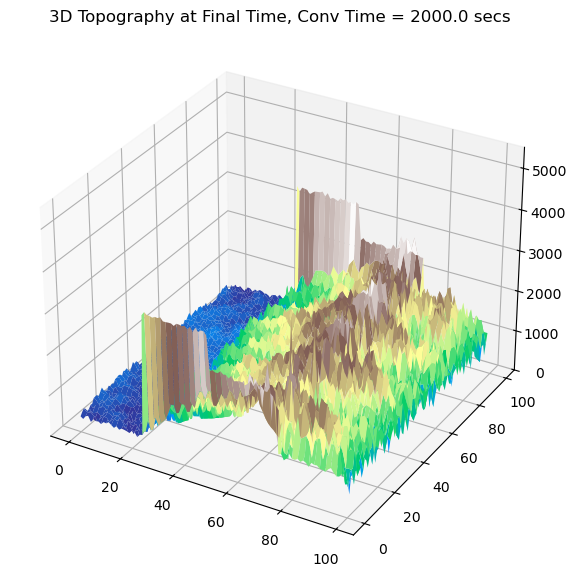

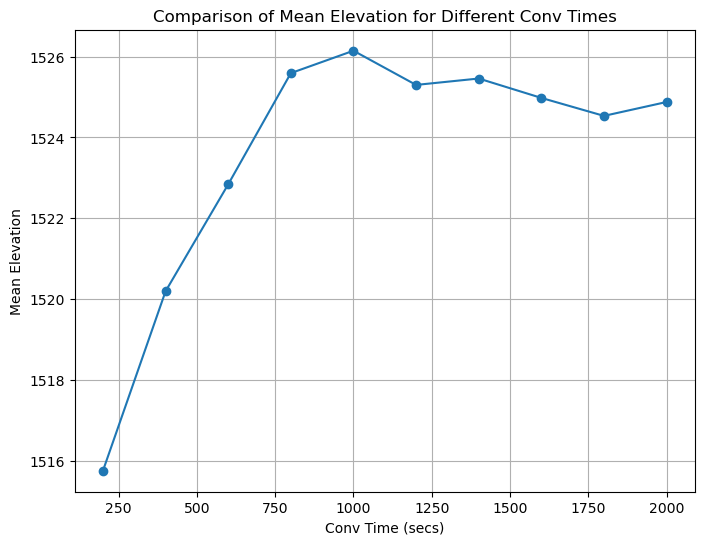

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import xsimlab as xs
import xarray as xr
from mpl_toolkits.mplot3d import Axes3D

# Define conv_time values to test
conv_time_values = np.linspace(200, 2000, 10)  # 200 to 2000

# Time steps to visualize
time_indices = [0, 1, 10, 100, 1000, 10000]
mean_elevations = []

def plot_results(out_ds_conv, conv_time):
    # Extract elevation and precipitation data
    elevation_data = out_ds_conv.topography__elevation.isel(time=time_indices)
    precip_data = out_ds_conv.orographic__precip_rate.isel(time=time_indices)
    
    # Print sample numerical outputs
    print(f"  - Mean elevation at final time: {elevation_data.isel(time=-1).mean().values:.2f} m")
    print(f"  - Max precipitation at final time: {precip_data.isel(time=-1).max().values:.2f} mm/hr")
    
    # Plot elevation
    fig, axes = plt.subplots(1, 6, figsize=(30, 5))
    for i, ax in enumerate(axes):
        elevation_data.isel(time=i).plot(ax=ax, vmin=0, vmax=5500, cmap='viridis')
        ax.set_title(f"time = {elevation_data.time[i].values}, Conv Time = {conv_time} secs")
    plt.tight_layout()
    plt.savefig(f"Elevation_ConvTime_{conv_time:.2f}.png")
    plt.show()
    
    # Plot precipitation
    fig, axes = plt.subplots(1, 6, figsize=(30, 5))
    for i, ax in enumerate(axes):
        precip_data.isel(time=i).plot(ax=ax, vmin=0, vmax=15, cmap='Blues')
        ax.set_title(f"time = {precip_data.time[i].values}, Conv Time = {conv_time} secs")
    plt.tight_layout()
    plt.savefig(f"Precipitation_ConvTime_{conv_time:.2f}.png")
    plt.show()
    
    # 3D Topographic Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(elevation_data.shape[1])
    y = np.arange(elevation_data.shape[2])
    X, Y = np.meshgrid(x, y)
    Z = elevation_data.isel(time=-1).values
    ax.plot_surface(X, Y, Z, cmap='terrain')
    ax.set_zlim(0, 5500)
    ax.set_title(f"3D Topography at Final Time, Conv Time = {conv_time} secs")
    plt.savefig(f"3D_Topography_ConvTime_{conv_time:.2f}.png")
    plt.show()

# Loop through conv_time values and run simulations
for conv_time in conv_time_values:
    print(f"Running simulation for conv_time = {conv_time} secs")
    
    # Set up the model with the current conv_time
    in_ds_conv = xs.create_setup(
        model=SouthernAndesLEM,
        clocks={
            'time': ModelTime_1,
            'output': ModelTime_1[::PlotStep]
        },
        master_clock='time',
        input_vars={
            'grid': {'shape': [nx, ny], 'length': [xl, yl]},
            'boundary': {'status': BoundaryCondition},
            'topography': {'elevation': RotatedTopography_2D},
            'bedrock': {'elevation': RotatedTopography_2D},
            'uplift': {'rate': RotatedUpliftRates_2D},
            'spl': {'k_coef': k_coef, 'area_exp': area_exp, 'slope_exp': slope_exp},
            'diffusion': {'diffusivity': diffusion_diffusivity},
            'orographic': {
                'lapse_rate': lapse_rate,
                'lapse_rate_m': lapse_rate_m,
                'ref_density': ref_density,
                'rainfall_frequency': rainfall_frequency,
                'latitude': latitude,
                'precip_base': precip_base,
                'wind_speed': wind_speed,  # Keep constant if needed
                'wind_dir': wind_dir,  # Wind direction remains constant or as needed
                'precip_min': precip_min,
                'conv_time': conv_time,  # Change conv_time
                'fall_time': fall_time,
                'nm': nm,
                'hw': hw,
            },
        },
        output_vars={'topography__elevation': 'time', 'orographic__precip_rate': 'time'}
    )

    # Run the simulation
    with xs.monitoring.ProgressBar():
        out_ds_conv = in_ds_conv.xsimlab.run(model=SouthernAndesLEM)
    
    # Calculate and store mean topography
    mean_topography = out_ds_conv.topography__elevation.isel(time=time_indices).mean().values
    mean_elevations.append(mean_topography)
    print(f"Mean Topography for conv_time = {conv_time} hrs: {mean_topography}")
    
    # Generate and save plots
    plot_results(out_ds_conv, conv_time)

# Plot comparison of mean elevations
plt.figure(figsize=(8, 6))
plt.plot(conv_time_values, mean_elevations, marker='o', linestyle='-')
plt.xlabel("Conv Time (secs)")
plt.ylabel("Mean Elevation")
plt.title("Comparison of Mean Elevation for Different Conv Times")
plt.grid()
plt.savefig("Mean_Elevation_Comparison_ConvTime.png")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)  # Leave space for slider

# Initial plot (first conv_time)
line, = ax.plot(time_indices, mean_elevations[0], marker='o', linestyle='-', label=f"Conv Time: {conv_time_values[0]:.1f} secs")
ax.set_xlabel("Time Step")
ax.set_ylabel("Mean Elevation")
ax.set_title("Mean Elevation Evolution Across Conv Times")
ax.legend()
ax.grid()

